## <span style="color:yellow"> **Fifa 21 Dataset** </span>


### **1- Cleaning and Preprocessing**


##### **Import Libraries & read our dataset <span style="color:lightblue">"Fifa21_dirty.csv"**</span>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Fifa21_dirty.csv')

##### **Let's take a look on our dataset:-**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20908 entries, 0 to 20907
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   photoUrl          10871 non-null  object 
 1   LongName          10905 non-null  object 
 2   playerUrl         10825 non-null  object 
 3   Nationality       10685 non-null  object 
 4   Positions         10839 non-null  object 
 5   Name              10868 non-null  object 
 6   Age               10872 non-null  float64
 7   ↓OVA              10876 non-null  float64
 8   POT               10882 non-null  float64
 9   Team & Contract   10997 non-null  object 
 10  ID                20908 non-null  int64  
 11  Height            10782 non-null  object 
 12  Weight            10826 non-null  object 
 13  foot              10931 non-null  object 
 14  BOV               10688 non-null  float64
 15  BP                10912 non-null  object 
 16  Growth            10845 non-null  float6

---


##### <span style="color:grey"> **we can spot few insights from the information we had above:**</span>

<!-- - we have <span style="color:yellow"> **20908 rows** </span> , and <span style="color:yellow"> **77 columns** </span> -->

- we can easily spot that the only column without any missing values is <span style="color:yellow">**ID**</span>


=> **actually that's very solid**, but <span style="color:red"> **WHY?????** </span>

- each player has his own <span style="color:yellow">**Unique ID** </span> <br>
  so, that means that two different players can't share the same **ID**

---

- in terms of DataBase, we can say: <br>
  The ID column serves as the <span style="color:yellow">**primary key** </span> for the FIFA 21 dataset. It uniquely identifies each player in the dataset, ensuring that no two players share the same ID.

---


##### **Based on what we have just said, we need to ensure the integrity of our data, and we can achieve this by two things:-** <br>

- 1- **remove any row that doesn't contain ID** <br> <br>
  since we have **20908 non-null ID** / **20908 rows**, that means that we don't have missing values in the ID section <span style="color:green">**GREAT!!** </span> <br>

---

2- **remove any duplicated rows <span style="color:red">Based on ID</span> & move result to a new file <span style="color:lightblue">"Fifa21-semi-cleaned.csv"**</span>


In [6]:
df = df.drop_duplicates(subset='ID', keep='first')
df.to_csv("Fifa21-semi-cleaned.csv", index=False)

---


##### **Read <span style="color:lightblue">"Fifa21-semi-cleaned.csv"</span>**


In [7]:
df = pd.read_csv('Fifa21-semi-cleaned.csv')

##### **now, Let's see our dataset information after removing duplicates**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18973 non-null  object
 1   LongName          18973 non-null  object
 2   playerUrl         18976 non-null  object
 3   Nationality       18974 non-null  object
 4   Positions         18974 non-null  object
 5   Name              18972 non-null  object
 6   Age               18978 non-null  int64 
 7   ↓OVA              18978 non-null  int64 
 8   POT               18978 non-null  int64 
 9   Team & Contract   18974 non-null  object
 10  ID                18978 non-null  int64 
 11  Height            18974 non-null  object
 12  Weight            18976 non-null  object
 13  foot              18971 non-null  object
 14  BOV               18978 non-null  int64 
 15  BP                18974 non-null  object
 16  Growth            18978 non-null  int64 
 17  Joined      

after removing duplicates, we now have <span style="color:yellow"> **18978 Unique IDs** </span>, which means <span style="color:yellow">**18978 different players** </span> in our dataset <br>


---


#### <span style="color:red">**Wait a second!!**</span> <br>

**look** at the data types of the columns!!!!!!!!!!!!!!!! <br>
almost <span style="color:red">**90%** </span>of them are <span style="color:red">**corrupted** </span>and need to be modified


In [ ]:
convert_to_str = [
    "photoUrl", "LongName", "playerUrl", "Nationality", 
    "Positions", "Name", "foot", "BP", "A/W", "D/W"
]

convert_to_int = [
    
    'Age', '↓OVA', 'POT', 'BOV', 'Growth',
    'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
    'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
    'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
    'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
    'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle',
    'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
    'Total Stats', 'Base Stats',
    'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'
]


for col in convert_to_str:
    df[col] = df[col].astype(str)

for col in convert_to_int:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)




df=df.to_csv("Fifa21-semi-cleaned.csv", index=False)


In [ ]:
df=pd.read_csv('Fifa21-semi-cleaned.csv')

In [ ]:
df.info()

**okay, we changed most of the columns datatypes, there are some columns with <span style="color:red">"object"</span> datatype that we will need to handle but after filling the missing values**


#### <span style="color:red">**Filling missing and corrupted values!!!**</span>

since we are deeling with Fifa21 players dataset, that means that the dataset is totally real and can be fetched to get the real values <br>

#### <span style="color:yellow">**but How ?????**</span> <br>

Actually, i seached for days for any sources that i can fetch these data from, examples: <br>

- futbin
- sofifa
- football-API
- TranferMarket <br>


- **i tried to use web scraping on some sites like sofifa, futbin, but it's totally <span style="color:red">forbidden</span> for some reason!**
- **i also tried to get their api, but some websites <span style="color:red">don't allow </span>the use of thier api and some allow but in a very <span style="color:red">limited</span> way!**


but i found a csv file for a clean fifa21 players dataset and i came up with an idea:-<br>
**<span style="color:yellow">Why not create my own FIFA 21 players API???</span> <br>**

- After some consideration, I decided to create my own API using Flask and deployed it on <span style="color:red">Vercel</span>.


#### **How the Search Works??** <br>

**The core idea behind your search is simple:**<br>

- <span style="color:yellow">**Searching by Player ID**</span>: Each player has a unique identifier (player ID). When you provide the player ID as part of the URL, the API retrieves the corresponding player's data.

Example URL: [https://fifa21api.vercel.app/player/20801](https://fifa21api.vercel.app/player/20801) returns the details for **Cristiano Ronaldo** <br>


---


#### **now, Let's fill the missing values using our <span style="color:yellow">API</span>!!**<br>

**<span style="color:yellow">let's take a long nap untill fetching the real data ends</span>,xddd!**


In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import numpy as np
tqdm.pandas()

df = pd.read_csv("Fifa21-semi-cleaned.csv")

def fetch_player_data(player_id):
    try:
        url = f"https://fifa21api.vercel.app/player/{player_id}"
        res = requests.get(url, timeout=5)
        if res.status_code == 200:
            return res.json()
    except Exception as e:
        print(f"Failed for ID {player_id}: {e}")
    return None

def is_valid(value):
    if value is None or (isinstance(value, float) and np.isnan(value)):
        return False
    if isinstance(value, str) and value.strip().lower() in ["", "nan", "none", "unknown", "n/a", "0"]:
        return False
    return True

def fill_all_columns(row):
    row = row.copy()
    api_data = fetch_player_data(row["ID"])
    if not api_data:
        return row

    for col in df.columns:
        if col in api_data and is_valid(api_data[col]):
            row[col] = api_data[col]
    return row

df = df.progress_apply(fill_all_columns, axis=1)
df.to_csv("Fifa21-filled.csv", index=False)



In [ ]:
df= pd.read_csv('Fifa21-filled.csv')

In [ ]:
df.info()

**now, after <span style="color:red">4.5 hours of waiting</span> data to be fully fetched from our API, we can see that we don't have any missing values! <span style="color:green">GREAT!!</span>** <br>

#### **BUT, we still have few things to handle:-**

- Converting height and weight from <span style="color:yellow">~~feet,pounds~~</span> to <span style="color:green">cm,kg</span>


In [109]:
df = pd.read_csv('Fifa21-filled.csv')

def height_to_cm(height_str):
    try:
        height_str = str(height_str).strip().replace('"', '')  # Clean input
        feet, inches = height_str.split("'")
        return round(int(feet) * 30.48 + int(inches) * 2.54, 2)
    except:
        return None  
    
def weight_to_kg(weight_str):
    try:
        weight_str = str(weight_str).strip().lower()  
        if 'lbs' in weight_str:
            pounds = int(weight_str.replace('lbs', '').strip())  
            return round(pounds * 0.453592, 2) 
        return None
    except:
        return None

df['Height'] = df['Height'].apply(height_to_cm).astype(int)
df['Weight'] = df['Weight'].apply(weight_to_kg).astype(int)
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

- Converting wage, value, realease clause, from <span style="color:yellow">~~€5M/K~~</span> to <span style="color:green">5000000/5000</span>


In [110]:
df = pd.read_csv('Fifa21-fully-cleaned.csv')
def convert_money(value_str):
    try:
        value_str = str(value_str).strip().replace('€', '').upper()  
        if 'M' in value_str:  
            return round(float(value_str.replace('M', '').strip()) * 1_000_000, 2)
        elif 'K' in value_str:  
            return round(float(value_str.replace('K', '').strip()) * 1_000, 2)
        return float(value_str)  
    except:
        return None

df['Wage'] = df['Wage'].apply(convert_money).astype(float)
df['Release Clause'] = df['Release Clause'].apply(convert_money).astype(float)
df['Value'] = df['Value'].apply(convert_money).astype(float)
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

- **convert** the Joined column format from <span style="color:red">**~~jul 7,2014~~**</span> to <span style="color:green">**dd-mm-yyyy**</span> (**datetime format**)


In [111]:
df = pd.read_csv('Fifa21-fully-cleaned.csv')
def convert_joined_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%b %d, %Y')  
    except:
        return None 
df['Joined'] = df['Joined'].apply(convert_joined_date).astype('datetime64[ns]')
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

- **splitting and stripping** team & contract column into Team, Contract <span style="color:green">t**o make things easier**</span>


In [112]:
df = pd.read_csv('Fifa21-fully-cleaned.csv')
def split_team_contract(value):
    try:
        value = value.strip()
        team, contract = value.split('\n')
        team = team.strip()  
        contract = contract.strip()  
        return pd.Series([team, contract]) 
    except:
        return pd.Series([None, None])  

df[['Team', 'Contract']] = df['Team & Contract'].apply(split_team_contract)
df = df.drop(columns=['Team & Contract'])
df.to_csv("Fifa21-fully-cleaned.csv", index=False)


now, <span style="color:green">**let's play!**</span> , i will rearrange columns to make the data **readable**


In [113]:
name_index = df.columns.get_loc('Name') 
df.insert(name_index + 1, 'Team', df.pop('Team'))  
df.insert(name_index + 2, 'Contract', df.pop('Contract'))
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

In [114]:
df.insert(0, 'ID', df.pop('ID'))
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

In [116]:
team_index = df.columns.get_loc('Team')
df.insert(team_index + 1, 'Joined', df.pop('Joined'))  

BOV_index = df.columns.get_loc('BOV')
df.insert(BOV_index + 1, 'Positions', df.pop('Positions'))  

POT_index = df.columns.get_loc('POT')
df.insert(POT_index + 1, 'Growth', df.pop('Growth'))  

df.to_csv("Fifa21-fully-cleaned.csv", index=False)

#### **okay,<span style="color:red"> Enough playing!!</span>**, let's continue working!! <br>

- we only need <span style="color:yellow">numbers from W/F, SM, IR</span> columns, **let's ignore special chars**


In [117]:
import re
def clean_numeric_value(value):
    try:
        return int(re.search(r'\d+', str(value)).group())
    except:
        return None
    
df['W/F'] = df['W/F'].apply(clean_numeric_value)
df['SM'] = df['SM'].apply(clean_numeric_value)
df['IR'] = df['IR'].apply(clean_numeric_value)

df.to_csv("Fifa21-fully-cleaned.csv", index=False)


- **change ~~Loan Date End~~ column to boolean column <span style="color:green">Loaned</span>**


In [118]:
df = pd.read_csv('Fifa21-fully-cleaned.csv')

def loaned(value):
    if pd.isna(value) or value == '':  
        return False  
    return True  

df['Loaned'] = df['Loan Date End'].apply(loaned)
df['Loaned'] = df['Loaned'].astype(bool)
df = df.drop(columns=['Loan Date End'])

contract_index = df.columns.get_loc('Contract')
df.insert(contract_index + 1, 'Loaned', df.pop('Loaned'))   
df.to_csv("Fifa21-fully-cleaned.csv", index=False)



In [119]:
df['Loaned'] = df['Loaned'].map({True: 'Yes', False: 'No'})
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

**- change ~~â†“OVA~~ column name to <span style="color:green">OVA</span>**


In [123]:
df=pd.read_csv('Fifa21-fully-cleaned.csv')
df.rename(columns={'↓OVA': 'OVA'}, inplace=True)
df.to_csv("Fifa21-fully-cleaned.csv", index=False)

- Finally, we Finished, **but we can spot few typos in the names of players and clubs (K. Mbappأ©)** <br>
  that's not a big deal, because it's just the file encoding languague support needs to be <span style="color:green">**utf-8**</span>


In [121]:
df = pd.read_csv("Fifa21-fully-cleaned.csv", encoding='utf-8')
df.to_csv("Fifa21-fully-cleaned.csv", index=False, encoding='utf-8-sig')


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Fifa21-fully-cleaned.csv')

gk_columns = ['DIV', 'HAN', 'KIC', 'REF', 'SPE', 'POS']
for col in gk_columns:
    df[col] = np.nan

is_gk = df['BP'] == 'GK'


base_stats = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
gk_mapping = {
    'PAC': 'DIV',
    'SHO': 'HAN',
    'PAS': 'KIC',
    'DRI': 'REF',
    'DEF': 'SPE',
    'PHY': 'POS'
}
for base_stat, gk_stat in gk_mapping.items():
    df.loc[is_gk, gk_stat] = df.loc[is_gk, base_stat]

df.loc[is_gk, base_stats] = np.nan
# df.head(10)
df.to_csv('Fifa21-fully-cleaned.csv', index=False)




In [ ]:
stat_columns = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'DIV', 'HAN', 'KIC', 'REF', 'SPE', 'POS']
df[stat_columns] = df[stat_columns].fillna(-1)
df[stat_columns] = df[stat_columns].astype(float)

df.to_csv("Fifa21-fully-cleaned.csv", index=False)


In [10]:
df = pd.read_csv('Fifa21-fully-cleaned.csv')

In [ ]:
df.info()

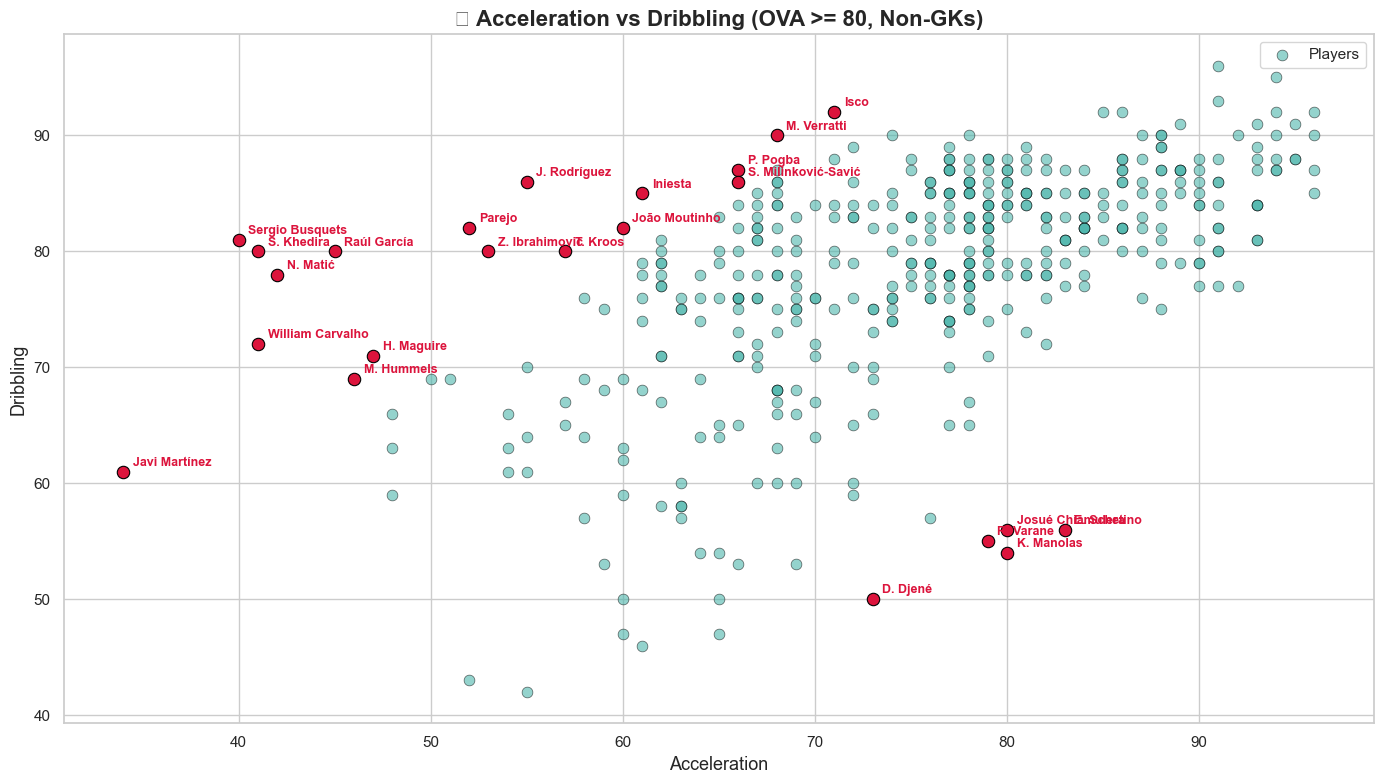

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Filter: non-GKs with OVA > 80
filtered = df[(df['OVA'] >= 80) & (~df['BP'].str.contains('GK', na=False))]

# Create the figure
plt.figure(figsize=(14, 8))
plt.scatter(filtered['Acceleration'], filtered['Dribbling'],
            alpha=0.6, s=60, c='#4db6ac', edgecolors='black', linewidths=0.5, label='Players')

# Highlight and annotate outliers
for i, row in filtered.iterrows():
    acc, dri = row['Acceleration'], row['Dribbling']
    if abs(acc - dri) >= 20:
        plt.scatter(acc, dri, c='crimson', s=80, edgecolors='black', linewidths=0.8)
        plt.annotate(row['Name'], (acc + 0.5, dri + 0.5),
                     fontsize=9, color='crimson', weight='bold')

# Labels & Title
plt.xlabel("Acceleration", fontsize=13)
plt.ylabel("Dribbling", fontsize=13)
plt.title("🎯 Acceleration vs Dribbling (OVA >= 80, Non-GKs)", fontsize=16, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

params = ['Heading Accuracy', 'PAC', 'DRI', 'SHO', 'PAS', 'PHY']
messi = df[df['ID'] == 158023][params].values[0]
ronaldo = df[df['ID'] == 20801][params].values[0]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=messi,
    theta=params,
    fill='toself',
    name='MESSI',
    line=dict(color='#e1aaff', width=3),
    opacity=0.8
))

fig.add_trace(go.Scatterpolar(
    r=ronaldo,
    theta=params,
    fill='toself',
    name='RONALDO',
    line=dict(color='#63c4c4', width=3),
    opacity=0.8
))

fig.update_layout(
    title='Messi vs Ronaldo - Stats Comparison',
    template='plotly_dark',
    polar=dict(
        bgcolor='#1f1f2e',
        radialaxis=dict(
            visible=True,
            range=[0, 100],
            color='white',
            gridcolor='#e1aaff'
        ),
        angularaxis=dict(
            color='white',
            gridcolor='#2e2e3d'
        )
    ),
    height=700,
    width=700,
    font=dict(family='Arial', size=14, color='white'),
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=-0.15,
        xanchor="center",
        x=0.5
    ),
    paper_bgcolor='#1f1f2e',
    plot_bgcolor='#1f1f2e'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("Fifa21-fully-cleaned.csv")
young_stars = df[(df["Age"] <= 21) & (df["POT"] >= 85)]
nation_counts = young_stars["Nationality"].value_counts().nlargest(15)

colors = ['#00c896', '#00b8d9', '#36cfc9', '#5cdbd3', '#bae7ff', '#91d5ff', '#69c0ff', '#40a9ff', '#1890ff', '#096dd9',
          '#0050b3', '#003a8c', '#002766', '#531dab', '#722ed1']
fig = go.Figure(go.Bar(
    x=nation_counts.values[::-1],
    y=nation_counts.index[::-1],
    orientation='h',
    marker_color=colors[::-1],
    hovertemplate='<b>%{y}</b><br>Youth Stars: %{x}<extra></extra>'
))

fig.update_layout(
    title='🌍 Top 15 Nations With the Most Talented Youth Players (≤21 y/o with POT ≥ 85)',
    xaxis_title='Number of Players',
    yaxis_title='Nationality',
    template='plotly_dark',
    height=600,
    width=950,
    font=dict(family='Trebuchet MS', size=14),
    margin=dict(l=100, r=40, t=80, b=40)
)

fig.show()


In [135]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("Fifa21-fully-cleaned.csv")
foot_counts = df.groupby(['BP', 'foot']).size().reset_index(name='count')

fig = px.bar(
    foot_counts,
    x='BP',
    y='count',
    color='foot',
    title=' Preferred Foot Distribution by Positions',
    color_discrete_map={'Right': '#1f77b4', 'Left': '#ff7f0e'},
    template='plotly_dark',
    labels={'count': 'Number of Players', 'Main Position': 'Position', 'foot': 'Preferred Foot'}
)

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Verdana', size=14),
    title_font_size=20,
    legend_title_text='Preferred Foot',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.90),
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=120)
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("Fifa21-fully-cleaned.csv")
fig = px.scatter(
    df,
    x='OVA',
    y='Wage',
    color='OVA',
    color_continuous_scale='Viridis',
    title='Player Salary vs. Overall Rating',
    labels={'OVA': 'Overall Rating', 'Wage': 'Salary'},
    hover_data=['Name', 'Team', 'Contract'],
    template='plotly_dark'
)

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Overall Rating',
    yaxis_title='Salary ',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("Fifa21-fully-cleaned.csv")

fig = px.box(
    df,
    x='BP',
    y='Height',
    color='BP',
    title='Distribution of Player Heights Across Different Positions',
    labels={'BP': 'Player Position', 'Height': 'Height (in cm)'},
    template='plotly_dark'
)

Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = df[(df['Height'] < lower_fence) | (df['Height'] > upper_fence)]

for i, row in outliers.iterrows():
    fig.add_annotation(
        x=row['BP'],
        y=row['Height'],
        text=row['Name'],
        showarrow=True,
        arrowhead=2,
        arrowsize=1.5,
        font=dict(size=10, color='white'),
        arrowcolor='white',
        bgcolor='rgba(0, 0, 0, 0.7)',
        borderpad=10,
        xanchor='center'
    )

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Player Position',
    yaxis_title='Height (in cm)',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()


In [138]:
import plotly.express as px

df = pd.read_csv("Fifa21-fully-cleaned.csv")
top_100_players = df.head(100)

fig = px.scatter(
    top_100_players,
    x='Nationality',
    y='Value',
    size='Value',  
    color='Nationality',
    hover_name='Name',
    hover_data=['Team', 'Positions', 'OVA', 'Wage'],
    title='💰 Top 100 Players by Rating - Market Value by Nationality',
    labels={'Nationality': 'Player Nationality', 'Value': 'Market Value (€)', 'OVA': 'Player Rating'},
    template='plotly_dark',
    size_max=60
)

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Player Nationality',
    yaxis_title='Market Value (€)',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

fig.show()


In [ ]:
import plotly.express as px


df = pd.read_csv("Fifa21-fully-cleaned.csv")
avg_wage_by_position = df.head(100).groupby('BP')['Wage'].mean().reset_index()
avg_wage_by_position = avg_wage_by_position.sort_values(by='Wage', ascending=False)

fig = px.bar(
    avg_wage_by_position,
    x='BP',
    y='Wage',
     color='BP',
    # hover_name='BP',
    hover_data=['Wage'],
    title='Average Salary by Player Position',
    labels={'Positions': 'Player Position', 'Wage': 'Average Wage (€)'},
    template='plotly_dark'
)


fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Player Position',
    yaxis_title='Average Wage (€)',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

fig.show()


In [ ]:
position_avg_age = df.head(100).groupby('BP')['Age'].mean().reset_index()
fig = px.bar(
    position_avg_age,
    x='BP',
    y='Age',
    title=' Average Age by Football Position',
    labels={'BP': 'Football Position', 'Age': 'Average Age'},
    color='Age',
    color_continuous_scale='RdYlBu',
    template='plotly_dark'
)


fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Position',
    yaxis_title='Average Age',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

fig.show()


In [ ]:

filtered_df = df[(df['Age'] < 25) & (df['OVA'] >= 80)]
best_potential_players = filtered_df.loc[filtered_df.groupby('BP')['POT'].idxmax()][['BP', 'Name', 'POT']]
fig = px.bar(
    best_potential_players,
    x='BP',
    y='POT',
    title='🌟 Best Potential Players (Under 25 & Rating >= 80) in Each Position',
    labels={'BP': 'Football Position', 'POT': 'Potential'},
    color='POT',
    color_continuous_scale='Viridis',
    text='Name',  # Show player names on the bars
    template='plotly_dark'
)

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Position',
    yaxis_title='Potential',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

fig.update_traces(textposition='outside', texttemplate='%{text}')

fig.show()


In [ ]:

top_clubs_wages = df.groupby('Team')['Wage'].sum().reset_index()
top_clubs_wages = top_clubs_wages.sort_values(by='Wage', ascending=False).head(10)

fig = px.bar(
    top_clubs_wages,
    x='Team',
    y='Wage',
    title='Top 10 Clubs with the Highest Wages',
    labels={'Team': 'Football Club', 'Wage': 'Total Wages (€)'},
    color='Wage',
    color_continuous_scale='Blues',
    template='plotly_dark'
)

fig.update_layout(
    height=600,
    width=950,
    font=dict(family='Arial', size=14),
    title_font_size=20,
    xaxis_title='Club',
    yaxis_title='Total Wage (€)',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

# Show the bar chart
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='DRI',  
    y='Height',  
    color='Age',  
    hover_name='Name',  
    title='Dribbling vs Height of Players',
    labels={'DRI': 'Dribbling', 'Height': 'Height (cm)', 'Age': 'Age'},
    template='plotly_dark',
    color_continuous_scale='Viridis', 
)

fig.update_layout(
    height=600,
    width=950,
    title_font_size=20,
    font=dict(family='Arial', size=14),
    xaxis_title='Dribbling',
    yaxis_title='Height (cm)',
    xaxis_tickangle=-45,
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()


In [ ]:
import plotly.express as px

top_100_shot_power = df.sort_values('Shot Power', ascending=False).head(100)
foot_counts = top_100_shot_power['foot'].value_counts().reset_index()
foot_counts.columns = ['Foot', 'Count']

fig = px.pie(
    foot_counts,
    names='Foot',
    values='Count',
    title='🥧 Left vs Right Footed Players in Top 100 by Shot Power',
    color='Foot',
    color_discrete_map={'Left': '#e91e63', 'Right': '#1a73e8'},
    template='plotly_dark',
    hole=0.4  
)
fig.update_traces(textinfo='percent+label', textfont_size=16, pull=[0.05, 0.05])

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='white'),
    legend_title_text='Preferred Foot',
    legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5)
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

outfield_players = df[df['BP'] != 'GK']  
top_10_players = outfield_players.sort_values('OVA', ascending=False).head(10)
params = ['PAC', 'DRI', 'SHO', 'PAS', 'DEF', 'PHY']

fig = go.Figure()
for _, player in top_10_players.iterrows():
    player_stats = player[params].values
    fig.add_trace(go.Scatterpolar(
        r=player_stats,
        theta=params,
        fill='toself',
        name=player['Name'],
        line=dict(width=2),
        opacity=0.6
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 100], showticklabels=True, tickvals=[20, 40, 60, 80, 100]),
        angularaxis=dict(tickvals=params, showline=True)
    ),
    showlegend=True,
    title='Top 10 Outfield Players Comparison by Stats (Rating Based)',
    template='plotly_dark',
    font=dict(size=12, family='Arial', color='white'),
    margin=dict(t=100, b=50, r=50, l=50)
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

params = ['PAC', 'DRI', 'SHO', 'PAS', 'DEF', 'PHY']
best_players_stats = {}
best_players_names = []

for stat in params:
    best_player = df.loc[df[stat].idxmax()]  
    best_players_stats[stat] = best_player[stat]
    best_players_names.append(f"{best_player['Name']} ({best_player[stat]})")  


complete_player = list(best_players_stats.values())
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=complete_player,
    theta=params,
    fill='toself',
    name='Complete Player',
    line=dict(width=2, color='rgb(255, 165, 0)'),
    opacity=0.8,
    marker=dict(color='rgb(255, 165, 0)', size=12)
))

for i, stat in enumerate(params):
    angle = np.pi / 3 * i  
    fig.add_trace(go.Scatterpolar(
        r=[best_players_stats[stat], best_players_stats[stat]],
        theta=[params[i], params[i]],
        mode='markers+text',
        text=[best_players_names[i]],
        textposition='top center',
        marker=dict(size=12, color='rgb(255, 165, 0)'),
        line=dict(width=2),
        opacity=1,
        name=best_players_names[i]  
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 100], showticklabels=True, tickvals=[20, 40, 60, 80, 100]),
        angularaxis=dict(tickvals=params, showline=True)
    ),
    showlegend=True,
    title='Complete Player',
    template='plotly_dark',
    font=dict(size=12, family='Arial', color='white'),
    margin=dict(t=100, b=50, r=50, l=50)
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load your data
# df = pd.read_csv('your_file.csv')

# Select only relevant base stats and wage
base_stat_columns = [
    'Wage', 'Base Stats', 'POT', 'Growth', 'BOV', 'Total Stats', 'OVA'
]

# Ensure all columns are present
base_stat_columns = [col for col in base_stat_columns if col in df.columns]

# Compute correlation matrix
corr_matrix = df[base_stat_columns].corr()

# Plot correlation heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Correlation between Wage and Base Stats'
)

fig.update_layout(width=700, height=600)
fig.show()


In [32]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Fifa21-fully-cleaned.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Extract correlation with 'OVA'
corr_with_ova = corr_matrix['OVA'].sort_values(ascending=False)

# Show the top correlations
print("Features most positively correlated with OVA:")
print(corr_with_ova.head(10))

print("\nFeatures most negatively correlated with OVA:")
print(corr_with_ova.tail(10))


Features most positively correlated with OVA:
OVA               1.000000
BOV               0.987148
Reactions         0.866935
Base Stats        0.845883
Composure         0.703019
POT               0.632107
Value             0.631628
Total Stats       0.620798
Release Clause    0.599076
Wage              0.584363
Name: OVA, dtype: float64

Features most negatively correlated with OVA:
GK Handling    0.004753
GK Kicking     0.001700
SPE           -0.001160
POS           -0.005669
REF           -0.009878
DIV           -0.011514
HAN           -0.012938
KIC           -0.016182
ID            -0.486998
Growth        -0.548004
Name: OVA, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score

# Load your dataset
df = pd.read_csv("Fifa21-fully-cleaned.csv")

# Select features and target
features = ['Age','Wage', 'Base Stats','Reactions','Value']
target = 'OVA'
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict, clip, and convert to int
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 1, 99)
y_pred = y_pred.round().astype(int)  # Round and convert to int

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = mse(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Create DataFrame for plotting
results_df = pd.DataFrame({'Actual OVA': y_test, 'Predicted OVA': y_pred})

# Plot using Plotly
fig = px.scatter(results_df, x='Actual OVA', y='Predicted OVA',
                 title=f'Actual vs Predicted OVA (R²={r2:.2f}, RMSE={rmse:.2f})',
                 labels={'Actual OVA': 'Actual OVA', 'Predicted OVA': 'Predicted OVA'},
                 opacity=0.6, trendline="ols")

fig.update_traces(marker=dict(color='royalblue'))
fig.update_layout(template="plotly_white")
fig.show()


R² Score: 0.855
RMSE: 6.777
